### Notebook to plot scatter plots for paper

@author Riley Troyer
science@rileytroyer.com

In [13]:
# Libraries
from datetime import datetime as dt
from datetime import time as dt_time
from datetime import timedelta
import h5py
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import numpy as np
import os
import pickle

In [14]:
# Read in the pickle file with data
with open('../../data/interim/statistics/'
          'pa-pfisr-data-dict-latest.pickle', 'rb') as handle:
    low_alt_data = pickle.load(handle)

In [15]:
# Get MLT based values to plot
mlt = []
mlt_altitudes = []
#altitude_key = 'peak_alt'
altitude_key = 'altitude'

for key in low_alt_data.keys():
    
    # Get data
    mlt_time = low_alt_data[key]['mlt_time']
    mlt_altitude = low_alt_data[key][altitude_key]
    
    # Check for nans
    if np.isnan(mlt_altitude):
        continue
    else:
        mlt.append(mlt_time)
        mlt_altitudes.append(mlt_altitude)
    
mlt_times = []
for mlt_time in mlt:
    if mlt_time.hour > 12:
        mlt_times.append(dt.combine(dt(2000, 1, 1).date(),
                                    mlt_time.time()))
    else:
        mlt_times.append(dt.combine(dt(2000, 1, 2).date(),
                                    mlt_time.time()))
        
#mlt_times = [dt.combine(dt.today().date(), d.time()) for d in mlt]
mlt_hours = [(t - dt.combine(t.date(),
                             dt_time(0))).total_seconds()/3600 
             for t in mlt]

# Convert to arrays
mlt_times = np.array(mlt_times)
mlt_altitudes = np.array(mlt_altitudes)

# Convert times to float for regression
float_times = np.array([(t - dt(2000, 1, 1)).total_seconds()/3600 
                        for t in mlt_times])

# Get average altitude per hour and include quartiles

# Get all unique hours in mlt times
hours = np.array([t.hour for t in mlt_times])
unique_hours = np.unique(hours)

# Make array to store average altitudes for each hour in
avg_hour_alts = np.zeros(len(unique_hours))
avg_hour_alts_q1 = np.zeros(len(unique_hours))
avg_hour_alts_q3 = np.zeros(len(unique_hours))

# Also an array to store datetime values for these hours
mlt_hours_1 = np.array([dt(2000, 1, 1, h, 30) 
                        for h in unique_hours if h > 12])
mlt_hours_2 = np.array([dt(2000, 1, 2, h, 30) 
                        for h in unique_hours if h <= 12])

mlt_hours = np.concatenate((mlt_hours_1, mlt_hours_2))

for n, mlt_time in enumerate(mlt_hours):
    
    # Get all altitudes
    hour_alts = mlt_altitudes[hours == mlt_time.hour]
    
    # Set average to array
    avg_hour_alts[n] = np.mean(hour_alts)
    
    # Get 1st (25%) quartile
    avg_hour_alts_q1[n] = np.median(hour_alts[hour_alts 
                                              < np.median(hour_alts)])
    
    # Get 3rd (75%) quartile
    avg_hour_alts_q3[n] = np.median(hour_alts[hour_alts 
                                              > np.median(hour_alts)])

In [16]:
# Get substorm delay values to plot
delays = []
delay_altitudes = []

for key in low_alt_data.keys():
    
    delay = low_alt_data[key]['delay']
    delay_altitude = low_alt_data[key][altitude_key]
    
    # Check if there are any nan values
    if np.isnan(delay) or np.isnan(delay_altitude):
        continue
#     # Or if delay is greater than 300 minutes
#     elif delay > 180:
#         continue
    else:
        delays.append(delay)
        delay_altitudes.append(delay_altitude)

# Arrange lists by delay length
zipped_data = zip(delays, delay_altitudes)
sorted_pairs = sorted(zipped_data)
tuples = zip(*sorted_pairs)
delays, delay_altitudes = [list(tuple) for tuple in tuples]

# Convert to arrays
delays = np.array(delays)
delay_altitudes = np.array(delay_altitudes)

# Average altitudes every 10 minutes
avg_alt_delays = np.arange(0, 180, 20)
avg_alts = np.zeros(len(avg_alt_delays))
avg_alts_q1 = np.zeros(len(avg_alt_delays))
avg_alts_q3 = np.zeros(len(avg_alt_delays))

# Loop through each bin and average
for n, delay in enumerate(avg_alt_delays):
    
    alts = delay_altitudes[(delays >= delay) & (delays < delay + 20)]
    
    avg_alts[n] = np.mean(alts)
    
    # Get 1st (25%) quartile
    avg_alts_q1[n] = np.median(alts[alts < np.median(alts)])

    # Get 3rd (75%) quartile
    avg_alts_q3[n] = np.median(alts[alts > np.median(alts)])

In [17]:
# Get AE index values to plot
ae_indices = []
ae_altitudes = []

for key in low_alt_data.keys():
    
    ae_index = low_alt_data[key]['ae_index']
    ae_altitude = low_alt_data[key][altitude_key]
    
    # Check if there are any nan values
    if np.isnan(ae_index) or np.isnan(ae_altitude):
        continue
    else:
        ae_indices.append(ae_index)
        ae_altitudes.append(ae_altitude)

# Arrange lists by delay length
zipped_data = zip(ae_indices, ae_altitudes)
sorted_pairs = sorted(zipped_data)
tuples = zip(*sorted_pairs)
ae_indices, ae_altitudes = [list(tuple) for tuple in tuples]

# Convert to arrays
ae_indices = np.array(ae_indices)
ae_altitudes = np.array(ae_altitudes)

# Get average values every 100 AE indices
avg_ae = np.arange(0, 1000, 100)
avg_ae_alts = np.zeros(len(avg_ae))
avg_ae_alts_q1 = np.zeros(len(avg_ae_alts))
avg_ae_alts_q3 = np.zeros(len(avg_ae_alts))

# Loop through each bin and average
for n, ae_index in enumerate(avg_ae):
    
    alts = ae_altitudes[(ae_indices >= ae_index)
                        & (ae_indices < ae_index + 100)]
    
    avg_ae_alts[n] = np.mean(alts)
    
    # Get 1st (25%) quartile
    avg_ae_alts_q1[n] = np.median(alts[alts < np.median(alts)])

    # Get 3rd (75%) quartile
    avg_ae_alts_q3[n] = np.median(alts[alts > np.median(alts)])

In [18]:
# Get AL index values to plot
al_indices = []
al_altitudes = []

for key in low_alt_data.keys():
    
    al_index = low_alt_data[key]['al_index']
    al_altitude = low_alt_data[key][altitude_key]
    
    # Check if there are any nan values
    if np.isnan(al_index) or np.isnan(al_altitude):
        continue
    else:
        al_indices.append(al_index)
        al_altitudes.append(al_altitude)

# Arrange lists by delay length
zipped_data = zip(al_indices, al_altitudes)
sorted_pairs = sorted(zipped_data)
tuples = zip(*sorted_pairs)
al_indices, al_altitudes = [list(tuple) for tuple in tuples]

# Convert to arrays
al_indices = np.array(al_indices)
al_altitudes = np.array(al_altitudes)

# Get average values every 100 AE indices
avg_al = np.arange(-900, 0, 100)
avg_al_alts = np.zeros(len(avg_al))
avg_al_alts_q1 = np.zeros(len(avg_al_alts))
avg_al_alts_q3 = np.zeros(len(avg_al_alts))

# Loop through each bin and average
for n, al_index in enumerate(avg_al):
    
    alts = al_altitudes[(al_indices >= al_index)
                        & (al_indices < al_index + 100)]
    
    avg_al_alts[n] = np.mean(alts)
    
    # Get 1st (25%) quartile
    avg_al_alts_q1[n] = np.median(alts[alts < np.median(alts)])

    # Get 3rd (75%) quartile
    avg_al_alts_q3[n] = np.median(alts[alts > np.median(alts)])

/venvs/troyer-etal-2022/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/venvs/troyer-etal-2022/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


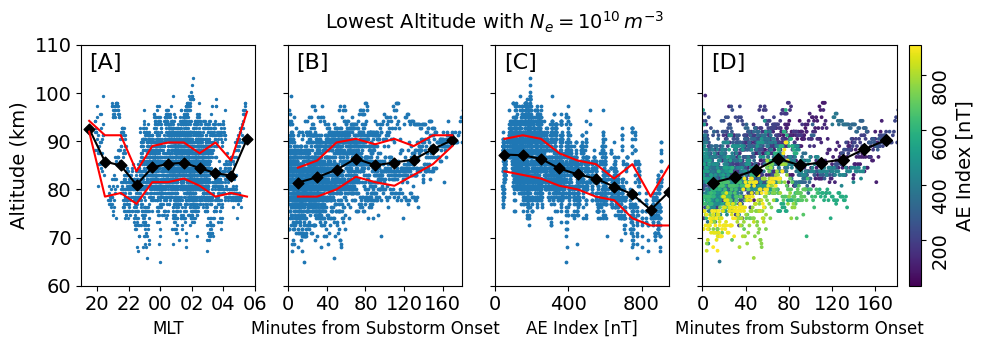

In [19]:
# Setup the plot
fig, axs = plt.subplots(1, 4, 
                        gridspec_kw={'width_ratios': [1, 1, 1, 1.4]},
                        figsize=(10, 3.5), sharey=True)

# Title
plt.suptitle(r'Lowest Altitude with $N_e = 10^{10}\,m^{-3}$',
             fontsize = 14)

# Setup the axis and ticks
axs[0].tick_params(which='major', labelsize=14)
axs[1].tick_params(which='major', labelsize=14)
axs[2].tick_params(which='major', labelsize=14)
axs[3].tick_params(which='major', labelsize=14)

axs[0].set_ylim(60, 110)
axs[0].set_ylabel('Altitude (km)', fontsize=14)

axs[0].set_xlabel('MLT', fontsize=12)

# Make times look good
time_locator = mdates.HourLocator(interval = 2)
h_fmt = mdates.DateFormatter('%H')
axs[0].xaxis.set_major_locator(time_locator)
axs[0].xaxis.set_major_formatter(h_fmt)

axs[1].set_xlim(0, 180)
axs[1].set_xlabel('Minutes from Substorm Onset', fontsize=12)

axs[2].set_xlim(0, 950)
axs[2].set_xlabel('AE Index [nT]', fontsize=12)

axs[3].set_xlim(0, 180)
axs[3].set_xlabel('Minutes from Substorm Onset', fontsize=12)

# Plot mlt data
axs[0].scatter(mlt_times, mlt_altitudes/1000, s=2, color='C0')

axs[0].plot(mlt_hours, avg_hour_alts/1000, color='black')
axs[0].scatter(mlt_hours, avg_hour_alts/1000, s=30, color='black',
               marker='D')

# Plot MLT quartiles
axs[0].plot(mlt_hours, avg_hour_alts_q1/1000, color='red')
axs[0].plot(mlt_hours, avg_hour_alts_q3/1000, color='red')

# Plot substorm data
axs[1].scatter(delays, delay_altitudes/1000, s=3, color='C0')
axs[1].plot(avg_alt_delays+10, avg_alts/1000, color='black')
axs[1].scatter(avg_alt_delays+10, avg_alts/1000, s=30,
           marker='D', color='black')
axs[1].set_xticks([0, 40, 80, 120, 160])

# Plot substorm quartiles
axs[1].plot(avg_alt_delays+10, avg_alts_q1/1000, color='red')
axs[1].plot(avg_alt_delays+10, avg_alts_q3/1000, color='red')

# Plot AE index data
axs[2].scatter(ae_indices, ae_altitudes/1000, s=3, color='C0')
axs[2].plot(avg_ae+50, avg_ae_alts/1000, color='black')
axs[2].scatter(avg_ae+50, avg_ae_alts/1000, s=30, marker='D',
               color='black')
axs[2].set_xticks([0, 400, 800])

# Plot AE quartiles
axs[2].plot(avg_ae+50, avg_ae_alts_q1/1000, color='red')
axs[2].plot(avg_ae+50, avg_ae_alts_q3/1000, color='red')

# Plot AE - Substorm combined

# Get values to plot
ae_indices_2 = []
delays_2 = []
altitudes_2 = []

for key in low_alt_data.keys():
    
    ae_index_2 = low_alt_data[key]['ae_index']
    
        
    delay_2 = low_alt_data[key]['delay']
    altitude_2 = low_alt_data[key]['altitude']

    ae_indices_2.append(ae_index_2)
    delays_2.append(delay_2)
    altitudes_2.append(altitude_2)

# Arrange lists by delay length
zipped_data = zip(ae_indices_2, delays_2, altitudes_2)
sorted_pairs = sorted(zipped_data)
tuples = zip(*sorted_pairs)
ae_indices_2, delays_2, altitudes_2 = [list(tuple) for tuple in tuples]

# Convert to arrays
ae_indices_2 = np.array(ae_indices_2)
delays_2 = np.array(delays_2)
altitudes_2 = np.array(altitudes_2)

# Average altitudes every 10 minutes
avg_alt_delays_2 = np.arange(0, 180, 20)
avg_alts_2 = np.zeros(len(avg_alt_delays_2))

# Loop through each bin and average
for n, delay_2 in enumerate(avg_alt_delays_2):
    
    avg_alts_2[n] = np.nanmean(altitudes_2[(delays_2 >= delay_2)
                                       & (delays_2 < delay_2 + 20)])
ae_sub = axs[3].scatter(delays_2, altitudes_2/1000, s=3,
                        c=ae_indices_2, cmap='viridis')
axs[3].plot(avg_alt_delays_2+10, avg_alts_2/1000, color='black')
axs[3].scatter(avg_alt_delays_2+10, avg_alts_2/1000,
               marker='D', color='black')
axs[3].set_xticks([0, 40, 80, 120, 160])

# Setup colorbar
cbar = fig.colorbar(ae_sub)
cbar.set_label('AE Index [nT]', fontsize=14)
cbar.ax.tick_params(labelsize=14, rotation=90)



# Add text to figures
axs[0].text(dt(2000, 1, 1, 19, 30), 105, '[A]', fontsize=16)
axs[1].text(8, 105, '[B]', fontsize=16)
axs[2].text(50, 105, '[C]', fontsize=16)
axs[3].text(8, 105, '[D]', fontsize=16)


plt.tight_layout()
plt.subplots_adjust(top=0.88)

# Save the figure
save_dir = ('reports/figures/paper/')   
# plt.savefig(save_dir 
#             + 'pa-energy-paper-scatter-plots-v7.jpg',
#             dpi=300)

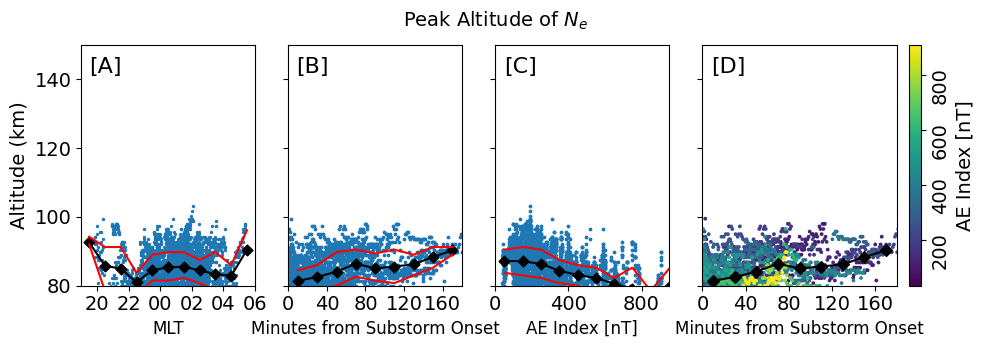

In [20]:
# Setup the plot
fig, axs = plt.subplots(1, 4, 
                        gridspec_kw={'width_ratios': [1, 1, 1, 1.4]},
                        figsize=(10, 3.5), sharey=True)

# Title
plt.suptitle(r'Peak Altitude of $N_e$',
             fontsize = 14)

# Setup the axis and ticks
axs[0].tick_params(which='major', labelsize=14)
axs[1].tick_params(which='major', labelsize=14)
axs[2].tick_params(which='major', labelsize=14)
axs[3].tick_params(which='major', labelsize=14)

axs[0].set_ylim(80, 150)
axs[0].set_ylabel('Altitude (km)', fontsize=14)

axs[0].set_xlabel('MLT', fontsize=12)

# Make times look good
time_locator = mdates.HourLocator(interval = 2)
h_fmt = mdates.DateFormatter('%H')
axs[0].xaxis.set_major_locator(time_locator)
axs[0].xaxis.set_major_formatter(h_fmt)

axs[1].set_xlim(0, 180)
axs[1].set_xlabel('Minutes from Substorm Onset', fontsize=12)

axs[2].set_xlim(0, 950)
axs[2].set_xlabel('AE Index [nT]', fontsize=12)

axs[3].set_xlim(0, 180)
axs[3].set_xlabel('Minutes from Substorm Onset', fontsize=12)

# Plot mlt data
axs[0].scatter(mlt_times, mlt_altitudes/1000, s=2, color='C0')

axs[0].plot(mlt_hours, avg_hour_alts/1000, color='black')
axs[0].scatter(mlt_hours, avg_hour_alts/1000, s=30, color='black',
               marker='D')

# Plot MLT quartiles
axs[0].plot(mlt_hours, avg_hour_alts_q1/1000, color='red')
axs[0].plot(mlt_hours, avg_hour_alts_q3/1000, color='red')

# Plot substorm data
axs[1].scatter(delays, delay_altitudes/1000, s=3, color='C0')
axs[1].plot(avg_alt_delays+10, avg_alts/1000, color='black')
axs[1].scatter(avg_alt_delays+10, avg_alts/1000, s=30,
           marker='D', color='black')
axs[1].set_xticks([0, 40, 80, 120, 160])

# Plot substorm quartiles
axs[1].plot(avg_alt_delays+10, avg_alts_q1/1000, color='red')
axs[1].plot(avg_alt_delays+10, avg_alts_q3/1000, color='red')

# Plot AE index data
axs[2].scatter(ae_indices, ae_altitudes/1000, s=3, color='C0')
axs[2].plot(avg_ae+50, avg_ae_alts/1000, color='black')
axs[2].scatter(avg_ae+50, avg_ae_alts/1000, s=30, marker='D',
               color='black')
axs[2].set_xticks([0, 400, 800])

# Plot AE quartiles
axs[2].plot(avg_ae+50, avg_ae_alts_q1/1000, color='red')
axs[2].plot(avg_ae+50, avg_ae_alts_q3/1000, color='red')

# Plot AE - Substorm combined

# Get values to plot
ae_indices_2 = []
delays_2 = []
altitudes_2 = []

for key in low_alt_data.keys():
    
    ae_index_2 = low_alt_data[key]['ae_index']
    
        
    delay_2 = low_alt_data[key]['delay']
    altitude_2 = low_alt_data[key][altitude_key]

    ae_indices_2.append(ae_index_2)
    delays_2.append(delay_2)
    altitudes_2.append(altitude_2)

# Arrange lists by delay length
zipped_data = zip(ae_indices_2, delays_2, altitudes_2)
sorted_pairs = sorted(zipped_data)
tuples = zip(*sorted_pairs)
ae_indices_2, delays_2, altitudes_2 = [list(tuple) for tuple in tuples]

# Convert to arrays
ae_indices_2 = np.array(ae_indices_2)
delays_2 = np.array(delays_2)
altitudes_2 = np.array(altitudes_2)

# Average altitudes every 10 minutes
avg_alt_delays_2 = np.arange(0, 180, 20)
avg_alts_2 = np.zeros(len(avg_alt_delays_2))

# Loop through each bin and average
for n, delay_2 in enumerate(avg_alt_delays_2):
    
    avg_alts_2[n] = np.nanmean(altitudes_2[(delays_2 >= delay_2)
                                       & (delays_2 < delay_2 + 20)])
ae_sub = axs[3].scatter(delays_2, altitudes_2/1000, s=3,
                        c=ae_indices_2, cmap='viridis')
axs[3].plot(avg_alt_delays_2+10, avg_alts_2/1000, color='black')
axs[3].scatter(avg_alt_delays_2+10, avg_alts_2/1000,
               marker='D', color='black')
axs[3].set_xticks([0, 40, 80, 120, 160])

# Setup colorbar
cbar = fig.colorbar(ae_sub)
cbar.set_label('AE Index [nT]', fontsize=14)
cbar.ax.tick_params(labelsize=14, rotation=90)



# Add text to figures
axs[0].text(dt(2000, 1, 1, 19, 30), 142, '[A]', fontsize=16)
axs[1].text(8, 142, '[B]', fontsize=16)
axs[2].text(50, 142, '[C]', fontsize=16)
axs[3].text(8, 142, '[D]', fontsize=16)


plt.tight_layout()
plt.subplots_adjust(top=0.88)

# # Save the figure
save_dir = ('reports/figures/paper/')   
# plt.savefig(save_dir 
#             + 'pa-energy-paper-scatter-plots-v7-peak-alt.jpg',
#             dpi=300)

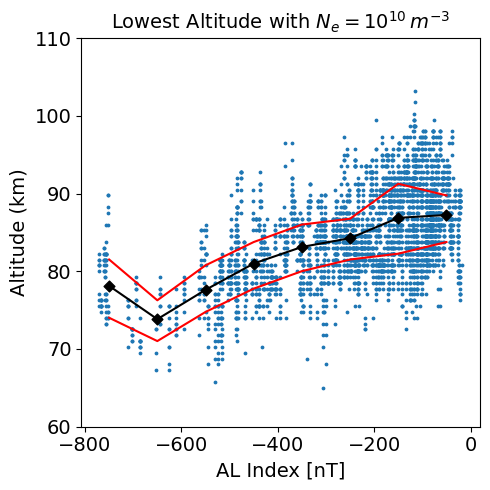

In [21]:
# Setup the plot
fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

# Title
ax.set_title(r'Lowest Altitude with $N_e = 10^{10}\,m^{-3}$',
             fontsize = 14)

# Setup the axis and ticks
ax.tick_params(which='major', labelsize=14)

ax.set_ylim(60, 110)
ax.set_ylabel('Altitude (km)', fontsize=14)

#axs[2].set_xlim(0, 950)
ax.set_xlabel('AL Index [nT]', fontsize=14)

# Plot AL index data
ax.scatter(al_indices, al_altitudes/1000, s=3, color='C0')
ax.plot(avg_al+50, avg_al_alts/1000, color='black')
ax.scatter(avg_al+50, avg_al_alts/1000, s=30, marker='D', color='black')

# Plot AL quartiles
ax.plot(avg_al+50, avg_al_alts_q1/1000, color='red')
ax.plot(avg_al+50, avg_al_alts_q3/1000, color='red')


plt.tight_layout()

# # Save the figure
save_dir = '../../reports/figures/paper/'
# plt.savefig(save_dir 
#             + 'pa-energy-paper-scatter-plot-al.jpg',
#             dpi=200)